<a href="https://colab.research.google.com/github/RafaelVillasmil/BIOF309_Introduction_to_Python/blob/main/RafaelV_unit_5_notebook_5b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 5 - Instructional DEMO 5b: Data visualization
 - **Focus:** Data visualization with a heavy focus on seaborn. 
 - **Author(s):** Sara B-C.
 - **Date Notebook Last Modified:** 08.20.2020
 - **Quick Description:** After you have visualized this demo (in the beginning just hit play and see how things work), go straight to working with real data and **complete the exercises**. Use the data found in `./example_data` to create your own plots. **This is your first big test and you will have to apply everything you have learned so far simultaneously. This is also probably the most fun as well.**

---
## Code outline
  0. Set up file stream (yep, this is in every notebook).
  1. Let's plot!!
  2. Scatter plot
  3. Categorical plot
  4. Line plot
  5. Facets
  6. Box plot
  7. Violin plot
  8. Bar plot
  9. Histogram
  10. Density plot
  11. Joint plot
  12. Linear regression plot
  13. Heatmap

---
## Additional notes
*   This is foundational data visualization. Remember data visualization done well is a field of study in and of itself. 

## 0. Lets set up filestream access
Follow the directions on screen as you run the code cell below and then you can access the data stored on your 'My Drive'. For many of you, this is the first python code you will ever execute knowingly, as most google infrastructure is python based (another reason why the language is growing)..You did this before, let's go!

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/BINF309_Introduction_to_Python/example_data/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Above you should now see the output "Mounted at /content/drive/". This means your storage is now connected to your notebook and its runtime. A runtime is the computer it will use to execute code and other computations. We'll cover what the above code means once you have learned some more python.

##1. Let's plot!
We will start installing seaborn, matplotlib, numpy and pandas. We will use the datasets available in seaborn to make some fancy plots!

In [ ]:
pip install git+https://github.com/mwaskom/seaborn.git

  Cloning https://github.com/mwaskom/seaborn.git to /tmp/pip-req-build-2k0zisrg
  Running command git clone -q https://github.com/mwaskom/seaborn.git /tmp/pip-req-build-2k0zisrg


In [ ]:
# Some quick package imports so you don't forget.
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

##2. Scatter plot
Here we take the default seaborn dataset called "tips" to plot "total bill" versus "tip"

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


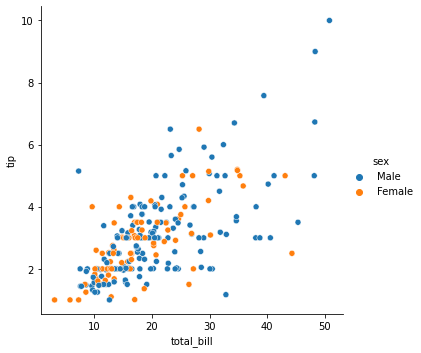

In [ ]:
sns_plot = sns.relplot(x="total_bill", y="tip", data=tips)
sns_plot.savefig("output1.png") # Save using matplot's savefig.

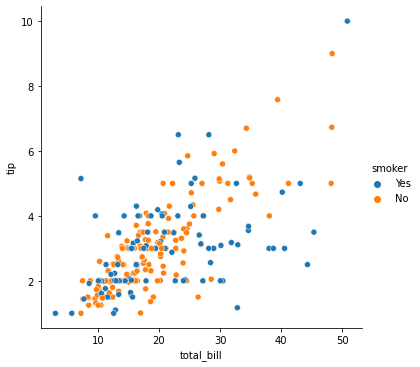

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips); # We can also make a scatter plot by smoking status (binary variable) with the "hue" function. Hue = color

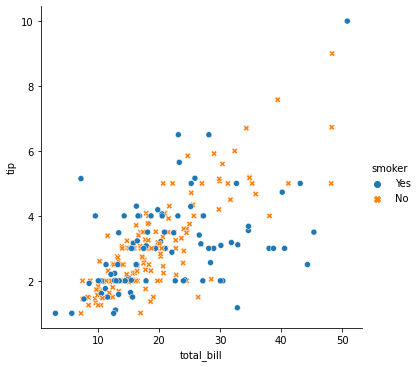

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips); # And also change the pattern with the "style" function

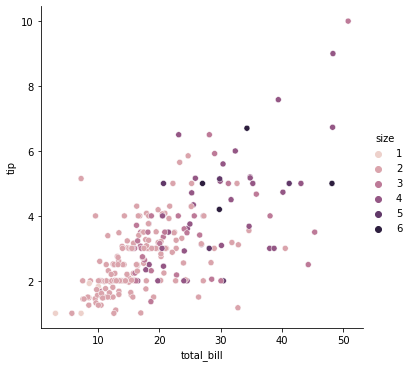

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips); # We can also make a scatter plot by size (continuous variable) specifying that variable with the hue semantics

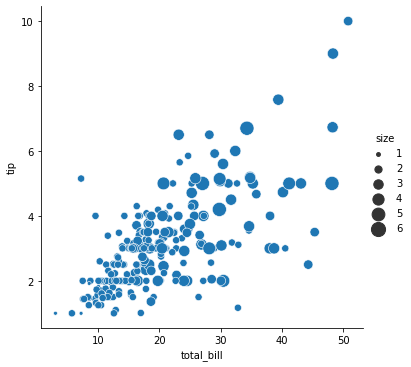

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips); # Or even use the "size" semantics to make various circles 

## 3. Categorical plot

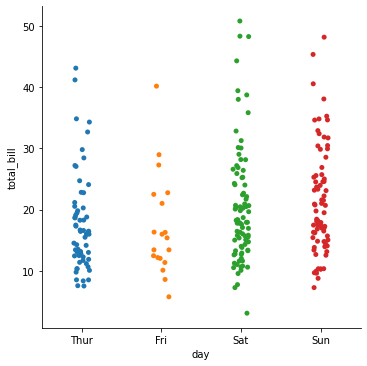

In [ ]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

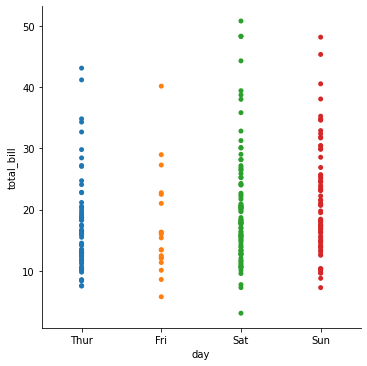

In [ ]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips); # The jitter parameter refers to the data variation. It controls the magnitude of jitter or disables it altogether. Here I'm disabling it 

## 4. Line plot
Here we use the default dataset "fmri" to plot "timepoint" versus "signal"

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


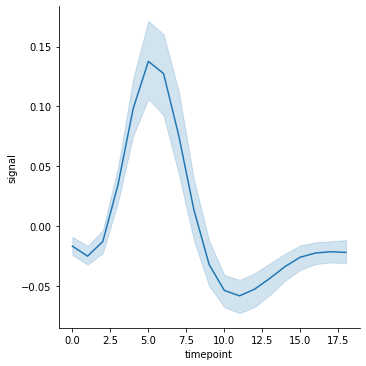

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

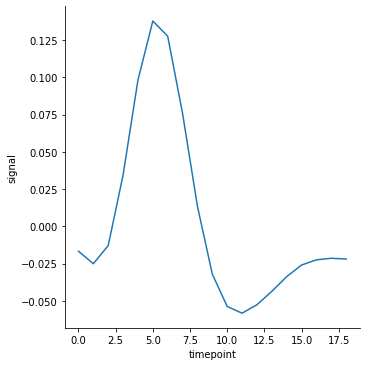

In [ ]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri); # By default the plot will add confidence intervals. We can remove them by typing "None"

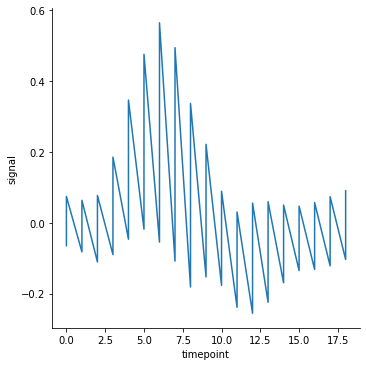

In [ ]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);# If you want to turn off the data aggregation, set the estimator parameter to "None". This might produce a strange effect when the data have multiple observations at each point.

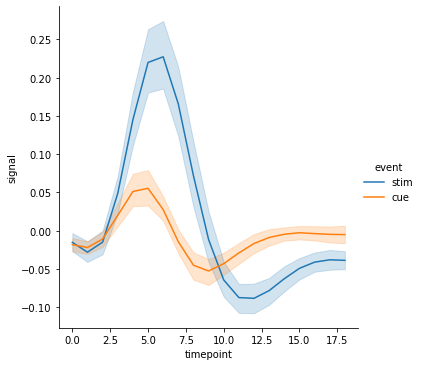

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri); # In a similar way as you did with the Scatter pltos, you can plot your data considering different variables. Here we plot by "event" specifying it with the hue semantics

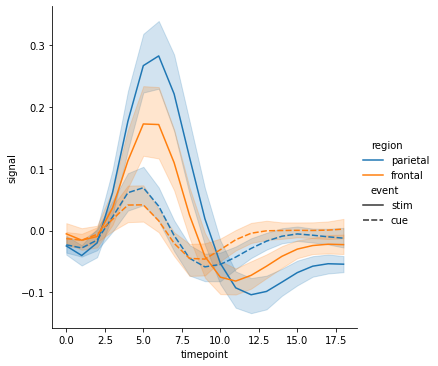

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", # You can also incorporate style semantics. Adding a style semantic to a line plot changes the pattern of dashes in the line by default:
            kind="line", data=fmri);

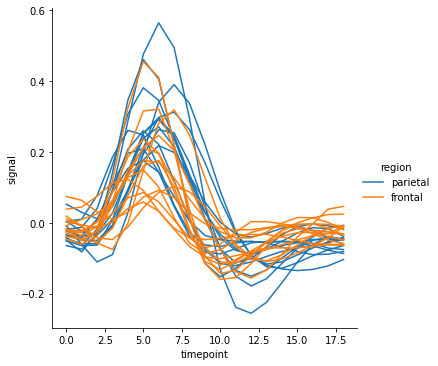

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", # Or even, you can plot each sampling unit separately without distinguishing them through semantics.
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

Let's now use the "dots" dataset to make some cool plots...


In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


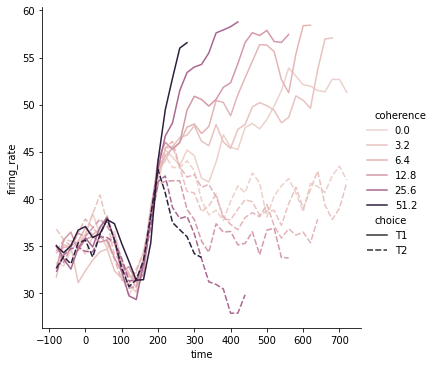

In [ ]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

##5. Facets
This is a great way to understand if the relationship between two variables depends on more than one other variable

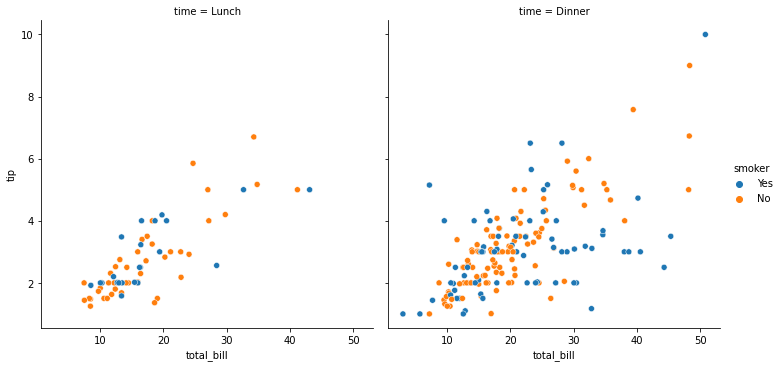

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", # The "col" variable will allow you to do so
            col="time", data=tips);

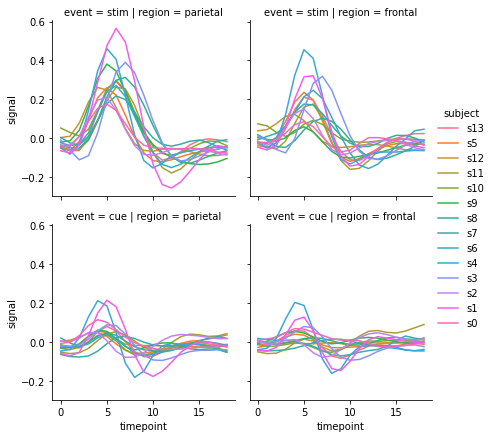

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject", # You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. 
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

## 6. Box plot

In [ ]:
tips.head() # Here we will use the "tips" dataset again to plot "day" versus "total_bill"

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


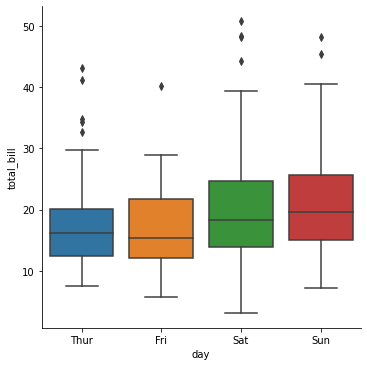

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips); # This kind of plot shows the three quartile values of the distribution along with extreme values. Observations that fall outside the range are displayed independently.

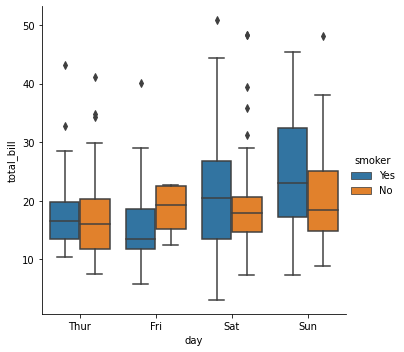

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips); # When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap

## 7. Violin plot

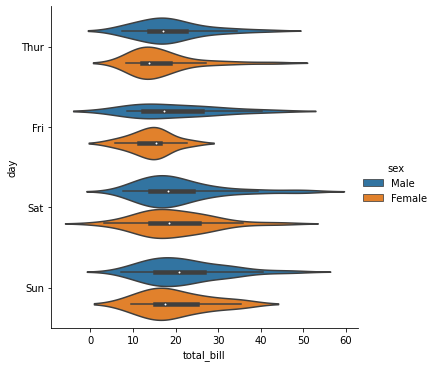

In [ ]:
sns.catplot(x="total_bill", y="day", hue="sex", # This plot combines a boxplot with the kernel density estimation procedure to provide a richer description of the distribution of values.
            kind="violin", data=tips);

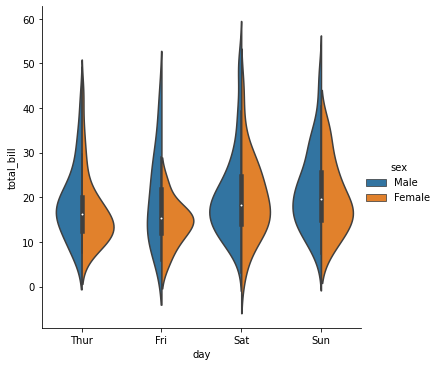

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",  # It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:
            kind="violin", split=True, data=tips);

##8. Bar plot
Here we will use the "Titanic" dataset

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


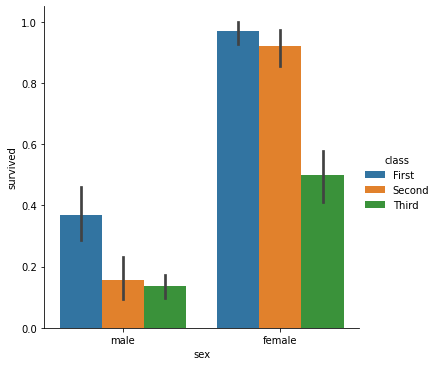

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic); 

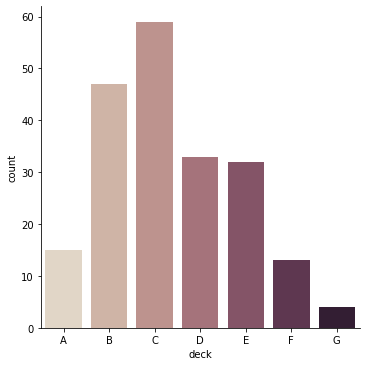

In [ ]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic); # A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. You can do it by adding "count" as the kind sematics

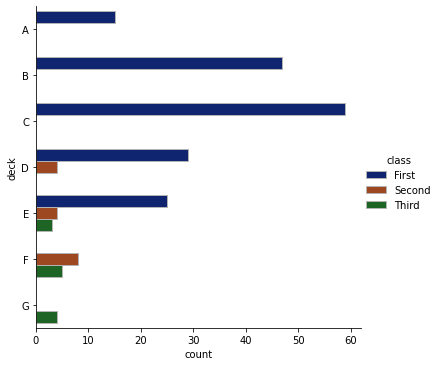

In [ ]:
sns.catplot(y="deck", hue="class", kind="count", 
            palette="dark", edgecolor=".7",
            data=titanic);

##9. Histogram

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


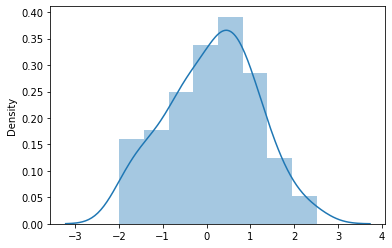

In [ ]:
x = np.random.normal(size=100) # The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function
sns.distplot(x);


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


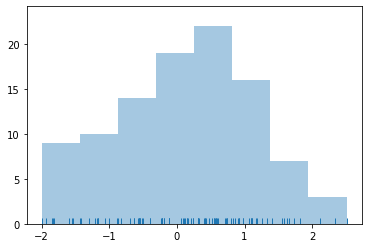

In [ ]:
sns.distplot(x, kde=False, rug=True); # Let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation

## 10. KDE Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


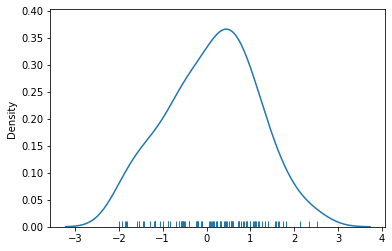

In [ ]:
sns.distplot(x, hist=False, rug=True);

## 11. Joint Plot

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


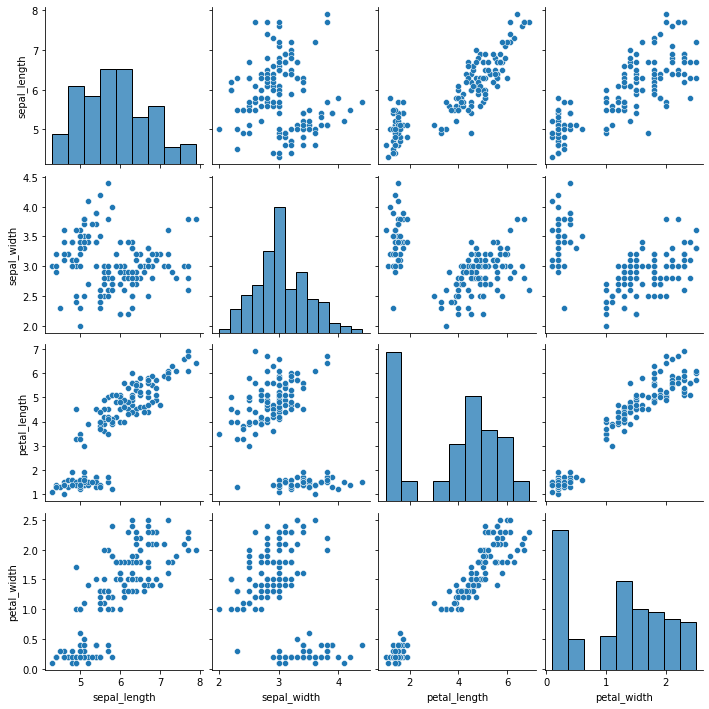

In [ ]:
# To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function
sns.pairplot(iris);

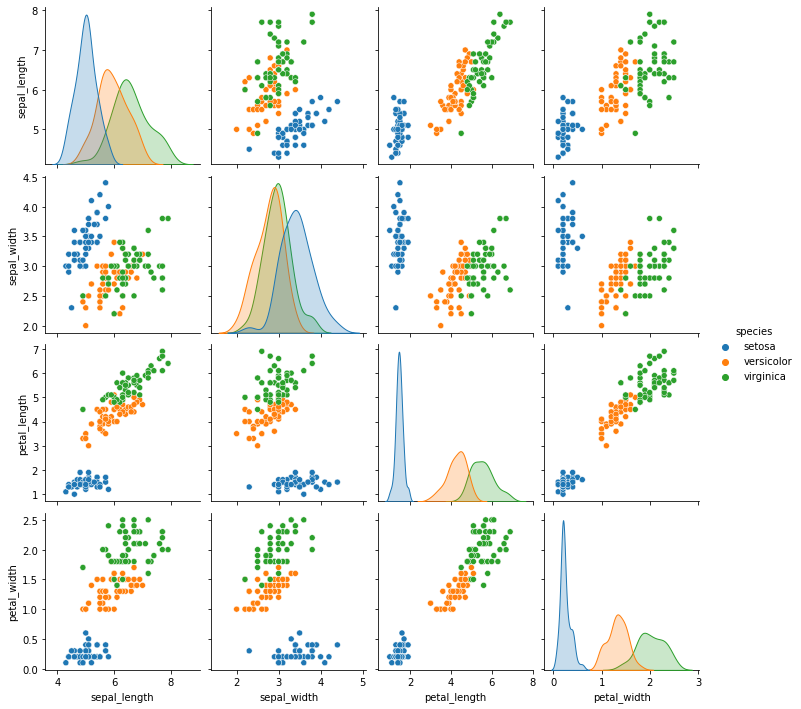

In [ ]:
sns.pairplot(iris, hue="species"); # Specifying the hue parameter automatically changes the histograms to KDE plots to facilitate comparisons between multiple distributions.

## 12. Linear regression plot
Let's go back to the "tips" dataset

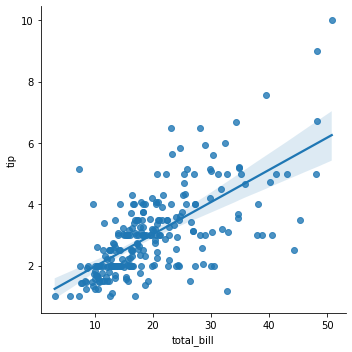

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips); # You can use the lmplot() function to display a linear regression plot

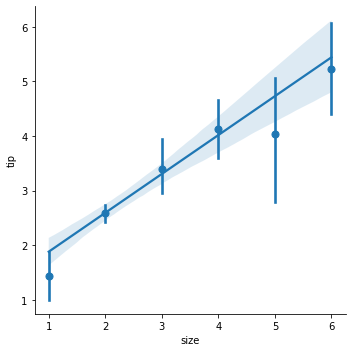

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);# You can plot an estimate of central tendency along with a confidence interval by using the "x_estimator" semantics

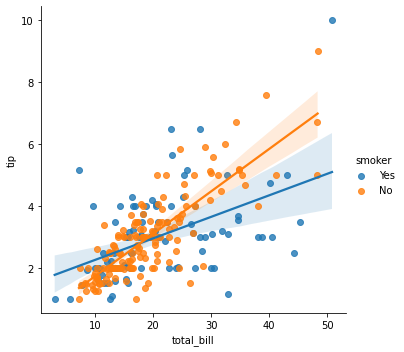

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips); # Again plot by the variable "smoker" using the hue semantics

## 13. Heatmap

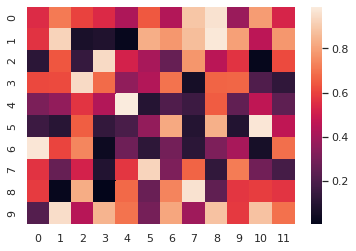

In [ ]:
import numpy as np; np.random.seed(0) # Here we plot a heatmap for a numpy array
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

# Unit 5 - Assignment #5b
***Come here to prove your knowledge.***

Text cells will indicate a task.  
Write your commands in the empty code cells below them.

## 1. Make a Scatter plot.

In [ ]:
# first, let me load some data. 
# https://www.kaggle.com/williamschooleman/scoobydoo-complete

SDdata = pd.read_csv('./Scooby_Doo_Episode_Data.csv')

# lets find data of int64 type
cols_int64 = SDdata.select_dtypes([np.int64]).columns
cols_int64

Index(['index', 'run.time', 'monster.amount', 'suspects.amount',
       'culprit.amount'],
      dtype='object')

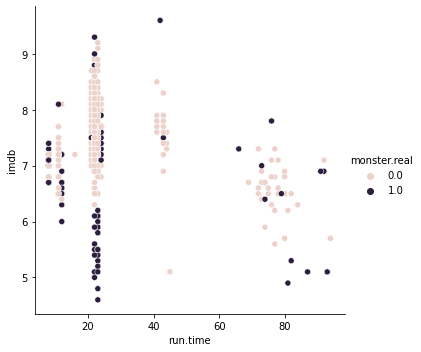

In [ ]:
# scatter plot of IMDB score vs. show lenght color by monster being real (1)
sns.relplot(x="run.time", y="imdb", hue="monster.real", data=SDdata); # Or even use the "size" semantics to make various circles 

## 2. Make a Regression plot.

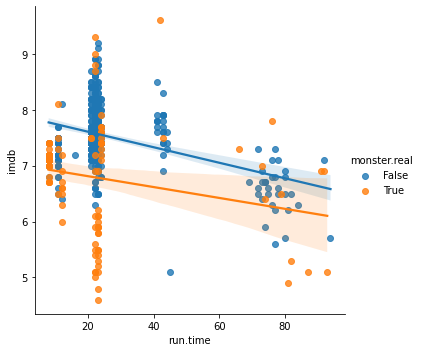

In [ ]:
sns.lmplot(x="run.time", y="imdb", hue="monster.real", data=SDdata)

## 3. Make a Heatmap.

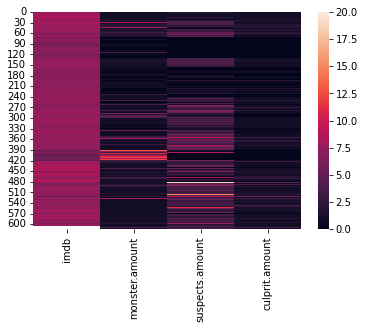

In [ ]:
sns.heatmap(SDdata[['imdb', 'monster.amount', 'suspects.amount',
       'culprit.amount']])

## 4. Make a Violin Plot.

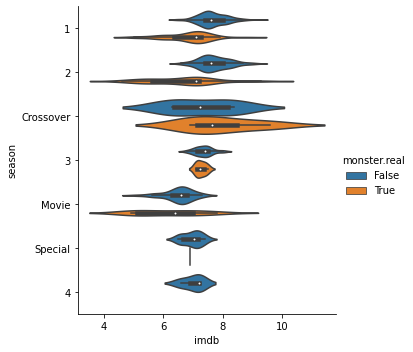

In [ ]:
sns.catplot(x="imdb", y="season", hue="monster.real", # This plot combines a boxplot with the kernel density estimation procedure to provide a richer description of the distribution of values.
            kind="violin", data=SDdata);

## 5. Showcase your favorite [colors](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) anyway you'd like.

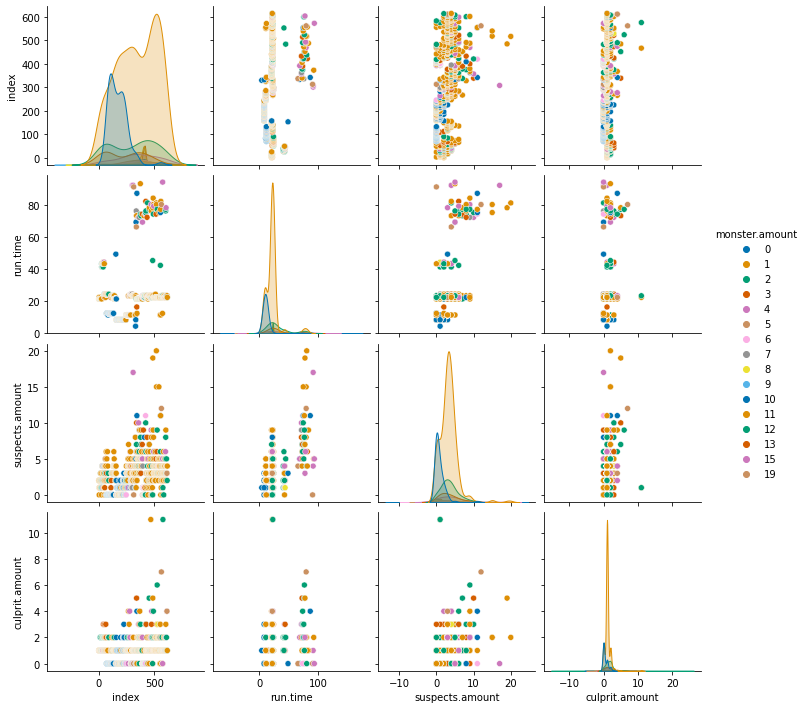

In [ ]:
sns.pairplot(SDdata[cols_int64], hue='monster.amount', palette='colorblind');

# Thanks, see you in the next unit!